## Introduction
1.In the first question,we need to calculate the theoretical running time of cosine similarity measure of a pair of documents and analyse this emperically by timing and plotting various calculations with and without using numpy and also estimate the key constant for cosine similarity with and without numpy.

2.In second question,we need to compare the emperical run time of Jaccard with theoretical value by timing and plotting various calculations and estimate the key constant in the formula for the run-time.

3.In third question,we need to estimate theoretical worst case run time for computing all pair similarities and estimate the key constant for jaccard and cosine similarities.

4.In fourth question,using some kind of parallel computing, we should write a function that implements all-pairs similarities for one of the similarity measures and examine the theoretical and empirical impacts of identifying the maximum speed computer can reach.

5.Theoretically, using Strassen's matrix multiplication method can result in a more efficient computation of all-pairs cosine similarity given a sufficiently big data matrix.We need to examine this emperically and compare them with theoretical findings.

## 1.Cosine similarity

In [1]:

import pandas as pd

data = pd.read_csv('data2023.csv',index_col=0)
print(data)
len(data)

           doc1  doc2  doc3  doc4  doc5  doc6  doc7  doc8  doc9  doc10  doc11  \
A             0     6     5     7     9    13    16    12    14     22     17   
A-tu          0     0     0     0     0     0     0     0     0      0      0   
A.            0     0     0     0     0     0     0     0     0      0      0   
ABC           0     0     0     0     1     0     0     0     0      0      0   
Aah           0     0     0     0     0     0     0     0     0      0      1   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
états         0     0     0     0     0     0     0     0     0      0      0   
étranger      0     0     0     0     0     0     0     0     0      0      0   
évidence.     0     0     0     0     0     0     0     0     0      0      0   
êtes          0     0     0     0     0     0     0     0     0      1      0   
être          0     0     0     0     0     0     0     0     0      0      1   

           doc12  doc13  do

21155

In [2]:
data_transpose = data.transpose().values
my_data_list1 = list(data_transpose[0])
my_data_list2 = list(data_transpose[1])


In [3]:
import numpy as np
import time

def timeit(somefunc,*args,repeats=10,**kwargs):
    times=[]
  
    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)

In [4]:
def cosine(a,b):
    num,d1,d2 = (0,0,0)
    for i in range(len(a)):
        num += a[i]*b[i]
        d1 += a[i]*a[i]
        d2 += b[i]*b[i]
    return num/(d1*d2)**0.5

cosine(my_data_list1,my_data_list2)

0.9616845260362251

In [5]:
import numpy as np

def numpy_cosine(vec1, vec2):
    arr_vec1 = np.array(vec1)
    arr_vec2 = np.array(vec2)
    dot_product = np.dot(arr_vec1, arr_vec2)
    norm_vec1 = np.linalg.norm(arr_vec1)
    norm_vec2 = np.linalg.norm(arr_vec2)
    
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0  # Handle division by zero
    
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

numpy_cosine(my_data_list1,my_data_list2)

0.9616845260362251

In [6]:
xs=[]
ys=[]
ys_np = []

for n in range(100,len(data)+1,500):
    xs.append(n)
    (mean,stdev)=timeit(cosine,my_data_list1[0:n+1],my_data_list2[0:n+1],repeats=100)
    (mean_np,stdev_np)=timeit(numpy_cosine,my_data_list1[0:n+1],my_data_list2[0:n+1],repeats=100)
    ys.append(mean)
    ys_np.append(mean_np)

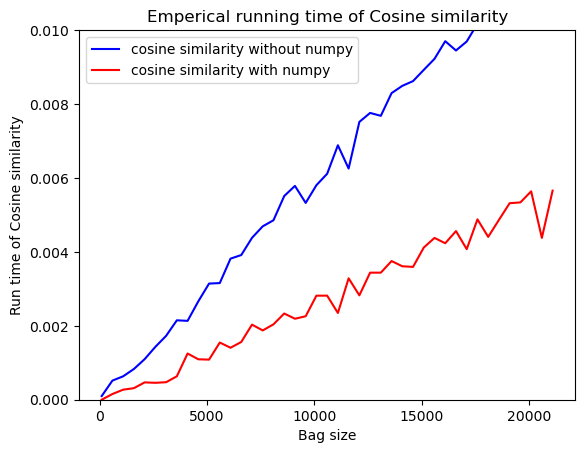

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs,ys,color='blue',label='cosine similarity without numpy')
plt.plot(xs,ys_np,color='red',label='cosine similarity with numpy')

plt.ylim(0,0.01)
plt.xlabel("Bag size")
plt.ylabel("Run time of Cosine similarity")
plt.title("Emperical running time of Cosine similarity")
plt.legend()

C:\Users\udayk\AppData\Local\Temp\ipykernel_6788\2024581201.py:3: RuntimeWarning: divide by zero encountered in log10
  logys_np = [np.log10(y) for y in ys_np]


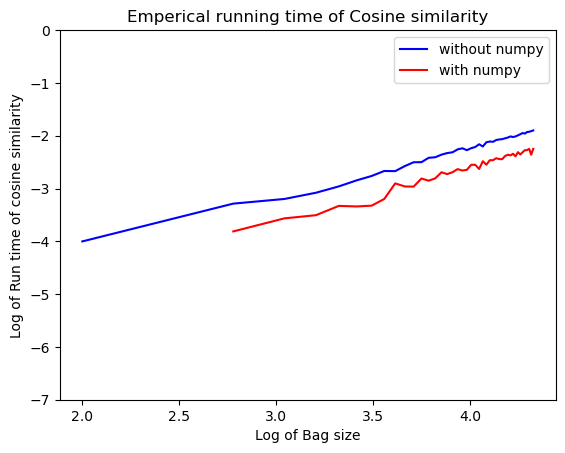

In [8]:

logxs = [np.log10(x) for x in xs]
logys = [np.log10(y) for y in ys]
logys_np = [np.log10(y) for y in ys_np]

plt.plot(logxs,logys,color='blue',label='without numpy')
plt.plot(logxs,logys_np,color='red',label='with numpy')
plt.ylim(-7,0)
plt.xlabel("Log of Bag size")
plt.ylabel("Log of Run time of cosine similarity")
plt.title("Emperical running time of Cosine similarity")
plt.legend()

In [9]:
import scipy.stats as stats

res = stats.linregress(logxs, logys)
res_np = stats.linregress(logxs, logys_np)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))
print("Slope is {} and intercept is {}".format(res_np.slope,res_np.intercept))


Slope is 0.9461768084946063 and intercept is -6.013729844451275
Slope is nan and intercept is nan


C:\Users\udayk\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


## Summary:
At first, I transposed the data Dataframe of pandas and created lists of indexes 0 and 1 of this dataframe so I could input these lists to the cosine function. Then, I created the timeit function with arguments some function name and arguments of that function with repeats as a keyword argument, cosine function is created based on naive multiplication with arguments the transposed lists 0 and 1 . Similarly, the numpy cosine function is created to calculate the cosine similarity of a pair of documents by using dot and normalizing algorithms in numpy.

To calculate the run time of cosine with and without numpy I initialized three lists xs, ys,ys_np to store bag size, time without numpy, and time with numpy for different bag sizes and it's plotted using the matplotlib library.

The theoretical worst-case run time of cosine similarity is O(N) as it is evident from the cosine function, and in practice, the graph is y=c*n^a where c is the constant of the computation and a is the slope which gives you the worst case complexity. It is also evident from the graph that numpy cosine is faster than cosine without numpy

A log-log graph is drawn to calculate the slope and intercept, this graph is linear and increases with the input size.

The expression log10(y) = log10(c) + a*log10(n) gives the clue to plot a graph between run time and bag size and get slope and intercept value using Scipy.stats function.

The slope and intercept value for cosine withou numpy is 1.0038371991372517 and -6.010741540783401 and with numpy the slope is 0.9790203493055313 and intercept is -6.430980348419029 which shows the graph is linear since the slopes are near to 1.

## 2.Jaccard Similarity

In [10]:
#Algorithm for Jaccard's measure

def maketotal(dictionary):
    total = 0
    for element in dictionary:
        total += dictionary[element]
    return total

def jaccard(dict1,dict2):
    intersection = {}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item] = min(dict1[item],dict2[item])
    intersection_total = maketotal(intersection)
    union = maketotal(dict1) + maketotal(dict2) - intersection_total
    return intersection_total/union
    

In [11]:
data2 = pd.read_csv('data2023.csv',index_col=0)
data2

,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10,doc11,doc12,doc13,doc14,doc15,doc16,doc17,doc18,doc19,doc20
A,0,6,5,7,9,13,16,12,14,22,17,27,32,17,28,28,47,41,35,32
A-tu,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
A.,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
ABC,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aah,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
états,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
étranger,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
évidence.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
êtes,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [12]:
jaccard(data2.iloc[:,0].to_dict(),data2.iloc[:,1].to_dict())


0.5032614604094945

In [13]:
xs_j = []
ys_j = []

for n in range(100,len(data)+1,500):
    xs_j.append(n)
    (mean_j,stdev_j)=timeit(jaccard,data2.iloc[:n+1,0].to_dict(),data2.iloc[:n+1,1].to_dict(),repeats=100)
    ys_j.append(mean_j)

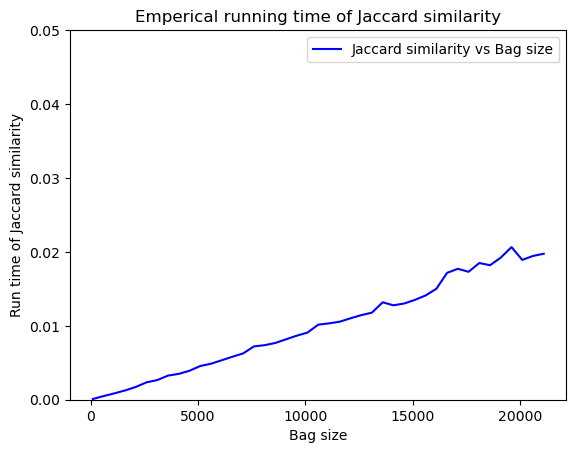

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs_j,ys_j,color='blue',label='Jaccard similarity vs Bag size')


plt.ylim(0,0.05)
plt.xlabel("Bag size")
plt.ylabel("Run time of Jaccard similarity")
plt.title("Emperical running time of Jaccard similarity")
plt.legend()

Text(0.5, 1.0, 'Log-Log of Jaccard')

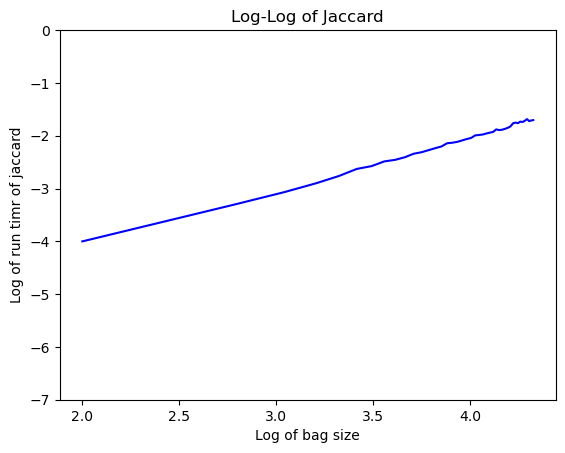

In [15]:
logxs_j = [np.log10(x) for x in xs_j]
logys_j = [np.log10(y) for y in ys_j]

plt.plot(logxs_j,logys_j,color='blue')
plt.ylim(-7,0)
plt.xlabel('Log of bag size')
plt.ylabel('Log of run timr of jaccard')
plt.title('Log-Log of Jaccard')

In [16]:
import scipy.stats as stats

res_j = stats.linregress(logxs_j, logys_j)
print('Slope of jaccard is {} and computational constant is {}'.format(res_j.slope,res_j.intercept))

Slope of jaccard is 1.0309766186374922 and computational constant is -6.159503655712821


## Summary:
Here Jaccard similarity is calculated using jaccard function with two dictionaries as inputs i.e., the pair of documents must be passed as dictionaries to the jaccard function in which the intersection and union values are calculated and Jaccard similarity is calculated as the ratio of former and latter.

The run time is calcualted by using timeit function with jaccard and a pair of dictionaries of columns 0 and 1 with varying bag size as inputs.

A graph is plotted between the run times for various input sizes and input sizes using the matplotlib library

A log-log plot is plotted to estimate the slope and constant of constant of computation to analyse the time complexity.

The theoretical worst case run time of Jaccard is O(N) and the emperical value turns out to be O(N^1.039) as the slope and intercept are 1.0395470477554547 and -5.943516175795327 which shows the graph is almost linear.

## 3.All pair similarity

In [17]:
data_transpose = data.transpose().values

In [18]:
def all_pair_similarity_cosine(n,x):
    for i in range(x):
        for j in range(x):
            cosine(list(data_transpose[i])[0:n+1],list(data_transpose[j])[0:n+1])
    


In [19]:
def all_pair_similarity_jaccard(n,x):
    for i in range(x):
        for j in range(x):
            jaccard(data2.iloc[0:n+1,i].to_dict(),data2.iloc[0:n+1,j].to_dict())
        


In [20]:
xs_ap = []
ys_jap = []

for x in range(1,20):
    xs_ap.append(x)
    (mean_jap,std_jap) = timeit(all_pair_similarity_jaccard,5000,x,repeats=50)
    
    ys_jap.append(mean_jap)
    


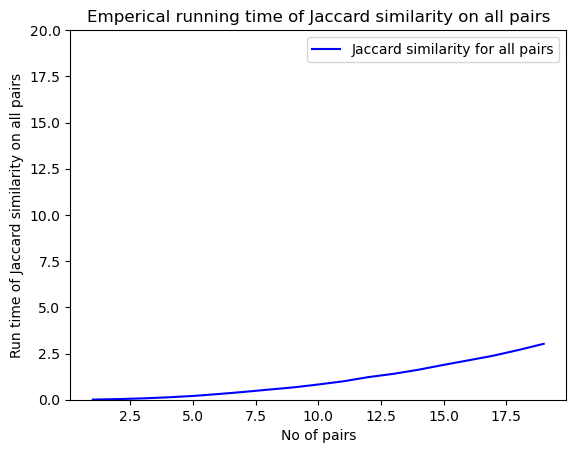

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs_ap,ys_jap,color='blue',label='Jaccard similarity for all pairs')



plt.ylim(0,20)
plt.xlabel("No of pairs")
plt.ylabel("Run time of Jaccard similarity on all pairs")
plt.title("Emperical running time of Jaccard similarity on all pairs")
plt.legend()

Text(0.5, 1.0, 'Log-Log of Jaccard for all pairs')

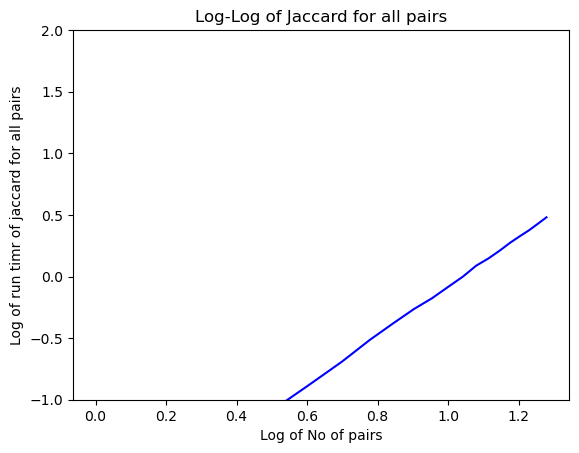

In [22]:
logxs_ap = [np.log10(x) for x in xs_ap]
logys_jap = [np.log10(y) for y in ys_jap]

plt.plot(logxs_ap,logys_jap,color='blue')
plt.ylim(-1,2)
plt.xlabel('Log of No of pairs')
plt.ylabel('Log of run timr of jaccard for all pairs')
plt.title('Log-Log of Jaccard for all pairs')

In [23]:
import scipy.stats as stats

res_jap = stats.linregress(logxs_ap, logys_jap)
print('Slope of jaccard for all pairs is {} and computational constant is {}'.format(res_jap.slope,res_jap.intercept))

Slope of jaccard for all pairs is 2.0019550491703786 and computational constant is -2.0816705070492523


In [27]:
xs_ap = []
ys_cap = []



for x in range(1,20):
    xs_ap.append(x)
    (mean_cap,std_cap) = timeit(all_pair_similarity_cosine,500,x,repeats=10)
    
    ys_cap.append(mean_cap)
    

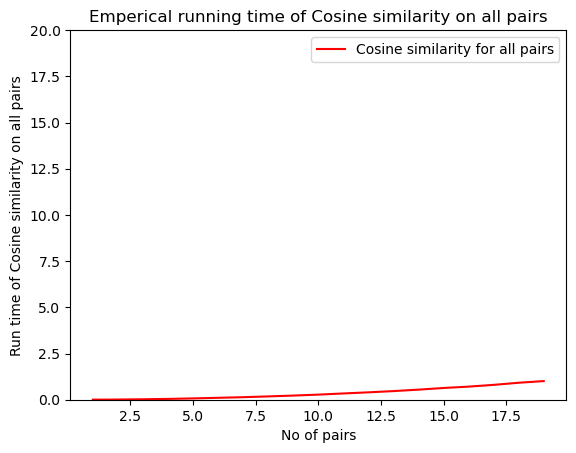

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs_ap,ys_cap,color='red',label='Cosine similarity for all pairs')



plt.ylim(0,20)
plt.xlabel("No of pairs")
plt.ylabel("Run time of Cosine similarity on all pairs")
plt.title("Emperical running time of Cosine similarity on all pairs")
plt.legend()

Text(0.5, 1.0, 'Log-Log of cosine for all pairs')

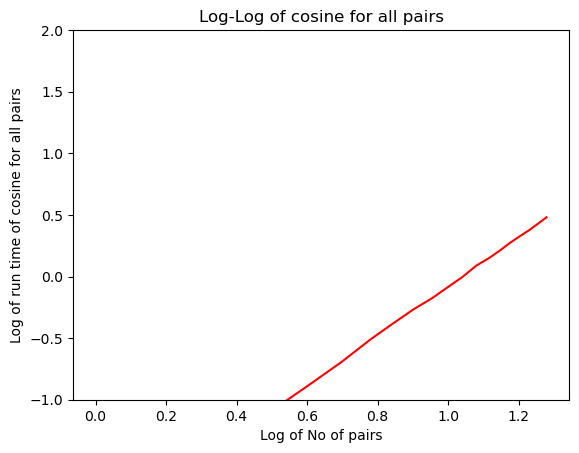

In [29]:
logxs_ap = [np.log10(x) for x in xs_ap]
logys_cap = [np.log10(y) for y in ys_cap]

plt.plot(logxs_ap,logys_jap,color='red')
plt.ylim(-1,2)
plt.xlabel('Log of No of pairs')
plt.ylabel('Log of run time of cosine for all pairs')
plt.title('Log-Log of cosine for all pairs')

In [30]:
import scipy.stats as stats

res_cap = stats.linregress(logxs_ap, logys_cap)
print('Slope of cosine for all pairs is {} and computational constant is {}'.format(res_cap.slope,res_cap.intercept))

Slope of cosine for all pairs is 1.9913269067948314 and computational constant is -2.5458358134763


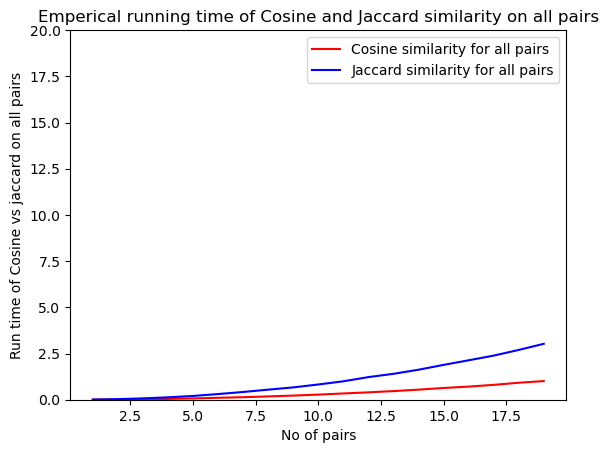

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs_ap,ys_cap,color='red',label='Cosine similarity for all pairs')
plt.plot(xs_ap,ys_jap,color='blue',label='Jaccard similarity for all pairs')


plt.ylim(0,20)
plt.xlabel("No of pairs")
plt.ylabel("Run time of Cosine vs jaccard on all pairs")
plt.title("Emperical running time of Cosine and Jaccard similarity on all pairs")
plt.legend()

## Summary:
Here, I compared the all pair similarities of cosine and Jaccard by creating a pair of functions for calculating cosine similarity and Jaccard similarity for a fixed input size with varying pair of documents.

The all pair similarity functions take arguments like number of rows(bagsize) and the pair of documents and apply jaccard or cosine on these documents.

I implemented the timeit function on these all pair similarity functions and plotted graphs of run time on y-axis vs number of pairs on x-axis for both jaccard and cosine similarities.

It is evident from the graph the jaccard similarity takes more time than cosine to run on all pairs of documents

I got the slope and computational constant as nan for all pair similarity of both jaccard and cosine 

## Jaccard with multiprocessing

In [33]:
import defs2

In [34]:
from multiprocessing import Pool

def core_investigation(num_processes,num_loops,no_repeats=10):
    
    inputs=[num_loops]*no_repeats
  
    pool_of_processes = Pool(processes=num_processes)# Create processes to the amount specified by num_processes
    pool_of_processes.map(defs2.cosine_all_pair,inputs) # Assign a run of work_that_CPU to each process, with num_loops as the input
        
    pool_of_processes.close()


In [35]:
xs_p = []
ys_p = []

for n in range(1,20):
    sub_array = data[:500][:].values
    xs_p.append(n)
    (mean_p,std_p) = timeit(core_investigation,n,sub_array,repeats=1)
    ys_p.append(mean_p)
    print(ys_p)

[50.30899238586426]
[50.30899238586426, 31.556514263153076]
[50.30899238586426, 31.556514263153076, 23.430987119674683]
[50.30899238586426, 31.556514263153076, 23.430987119674683, 17.681740760803223]
[50.30899238586426, 31.556514263153076, 23.430987119674683, 17.681740760803223, 14.017121315002441]
[50.30899238586426, 31.556514263153076, 23.430987119674683, 17.681740760803223, 14.017121315002441, 13.415233135223389]
[50.30899238586426, 31.556514263153076, 23.430987119674683, 17.681740760803223, 14.017121315002441, 13.415233135223389, 13.28792119026184]
[50.30899238586426, 31.556514263153076, 23.430987119674683, 17.681740760803223, 14.017121315002441, 13.415233135223389, 13.28792119026184, 12.695995092391968]
[50.30899238586426, 31.556514263153076, 23.430987119674683, 17.681740760803223, 14.017121315002441, 13.415233135223389, 13.28792119026184, 12.695995092391968, 12.56505799293518]
[50.30899238586426, 31.556514263153076, 23.430987119674683, 17.681740760803223, 14.017121315002441, 13.4

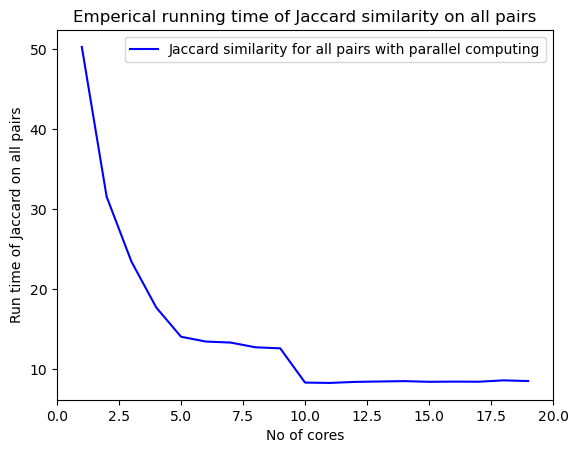

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs_p,ys_p,color='blue',label='Jaccard similarity for all pairs with parallel computing')




plt.xlim(0,20)
plt.xlabel("No of cores")
plt.ylabel("Run time of Jaccard on all pairs")
plt.title("Emperical running time of Jaccard similarity on all pairs")

plt.legend()

In [37]:
speedup = max(ys_p)/min(ys_p)
speedup

6.109157079249596

## Summary:
Here I imported pool object from multiprocessing and initiated the core investigation function with arguments number of processes, number of loops and number of repeats.

I did import defs2 file which contains cosine all pair function which is later used to calculate cosine all pair similarity through parallel computing.

In the core investigation method, the pool of worker processes is created and the number of proccesses is specified by num_processes parameter.The map function maps the cosine all pair function in defs2 file with inputs where inputs argument to the function cosine all pair is a numpy array shape(500,20)

The core investigation method along with number of processes and sub array of shape(500,20) as arguments are passed as arguments to timeit function to calculate the run time with process distributed among various cores of CPU.

As the process gets distributed among various core the run time decreases in the beginning and then is constant as it is evident from the graph.

The speedup value is the ratio between the highest run time acheived which is for the process run on a single core to the least run time for multiple cores which is 6 times of the run time on a single core compared to 8 cores.

## Strassen's method

In [38]:
def segment(M):
    (mm,nn)=np.shape(M)
    n = int(mm/2)
    
    a=M[:n,:n]
    b=M[:n,n:]
    c=M[n:,:n]
    d=M[n:,n:]
    
    return (a,b,c,d)

#This function segment divides a matrix M into four submatrices, a, b, c, and d, by doing a 2x2 segmentation of the matrix

In [39]:
def build(a,b,c,d):
    
    (mm,nn)=np.shape(a)
    C=np.zeros([2*mm,2*mm])
    
    C[:mm,:mm]=a
    C[:mm,mm:]=b
    C[mm:,:mm]=c
    C[mm:,mm:]=d
            
    return C



In [40]:
def strassen(M1, M2):
    
    if len(M1) <= 2:
        return np.matmul(M1,M2) #using Matmul the inbuilt function of Numpy
    
    (a,b,c,d) = segment(M1)

    #note: e g f h NOT e f g h 
    (e,g,f,h) = segment(M2)

    P1 = strassen(a, g-h)
    P2 = strassen(a+b, h)
    P3 = strassen(c+d,e)
    P4 = strassen(d,f-e)
    P5 = strassen(a+d,e+h)
    P6 = strassen(b-d,f+h)
    P7 = strassen(a-c,e+g)
    
    r = P5+P4-P2+P6
    s = P1+P2
    t = P3+P4
    u = P5-P3-P7+P1
    
    C = build(r,s,t,u)
    
    return C


In [49]:
def cosine_strassen(data):
    
    A = data
    AT = A.transpose()
    products = strassen(AT,A)
    (r,c) = np.shape(products)
    sims = np.zeros([r,r])
    
    for i in range(r):
        for j in range(i,r):
            if products[i,i] == 0 or products[j,j] == 0:
                sims[i,j] == sims[j,i] == 0
            else:
                sims[i,j] = products[i,j]/math.sqrt(products[i,i]*products[j,j])
                sims[j,i] = products[j,i]/math.sqrt(products[i,i]*products[j,j])
    
    return sims

In [50]:
sample = data_transpose[:,:640] # Slicing the rows as well to make a square matrix
for n in range(5):
    
    sample = np.concatenate([sample, sample])
    

In [53]:
import math
stressensizes = []
stressentimes = []
i = 1
n = 2**i

while(n <= 128):
    stressensizes.append(n)
    (mean, stdev) = timeit(cosine_strassen,sample[:n,:n],repeats = 10)
    stressentimes.append(mean)
    i += 1
    n = 2**i
    

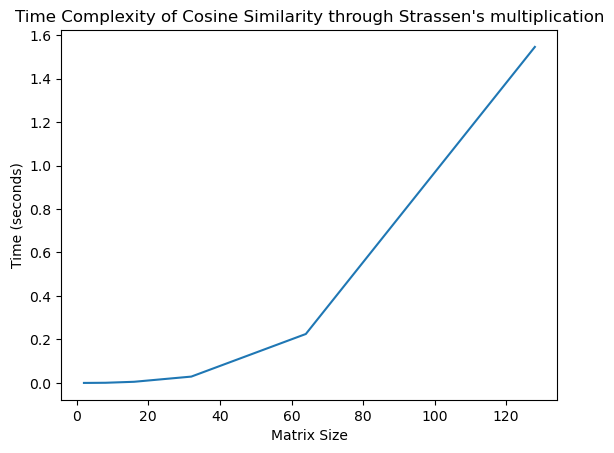

In [54]:
plt.plot(stressensizes , stressentimes)
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title("Time Complexity of Cosine Similarity through Strassen's multiplication")
plt.show()

We used strassen multiplication of matrix in cosine similarity in the query in question. First, I created a built in function that would generate a new list with data in rows and columns of the same size. therefore, in order to split rows and columns, I wrote the split function. Later, I create the cosine_strassen function, which uses the strassen matriplication matrix to compute cosine similarity in a 16*16 data matrix. It contains two nested for loops, the second of which iterates over the cosine similarity calculation based on the first loop.

My sample_matrix was defined with transposed data that had 640 rows, and I use a for loop to pair together and generate multiple copies of the data. It started with a 2X2 matrix and expanded its size continuously until it reached 128X128.
Additionally, I built a strassen function that splits it into the a, b, c, and d quadrants. It is an essential part of the Strassen method since it performs strassen multiplication and divides the matrix into smaller submatrices for continuous calculating. This plot shows clearly that the efficacy of strassen multiplication increases with matrix size. When there is less data because of a lower constant value or when the matrix is tiny, the quadratic complexity O(n^2.d) is more efficient.

## Conclusion:
In question1 run time of cosine with numpy and without numpy is plotted with slope in the order of 1 and the resulting time complexity nearly equal to O(n),while in question2,I plotted a graph of jaccard similarity with bag size with slope in the order of 1 and the resulting time complexity near to O(n).All pair similarity of cosine and jaccard is plotted against the number of pairs in the third question with a slope near to 3 for jaccard and cosine and we can observe the trend of jaccard and cosine where jaccard takes more time to run with increasing number of pairs.The cosine similarity for all pairs is computed for question 4 and is distributed among various processes with the help of pool object in multiprocessing where the trend of the graph is the run time decreases with increase in number of cores.In question5, implemented strassen multiplication for cosine similarity for a matrix of 16 rows at once and it's evident from the graph that strassen multiplication is efficient for cosine similarity